In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from KNN_main import KNN

<function matplotlib.pyplot.show(close=None, block=None)>

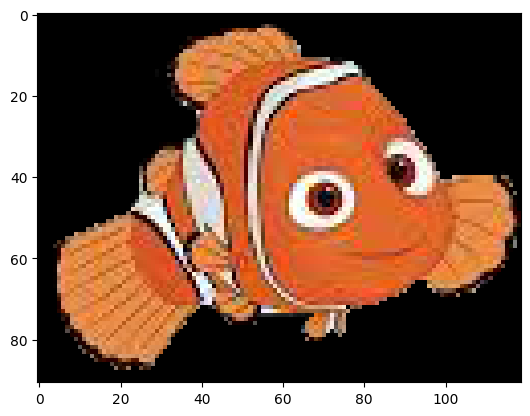

In [75]:
nemo = cv2.imread("nemo.png")
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show

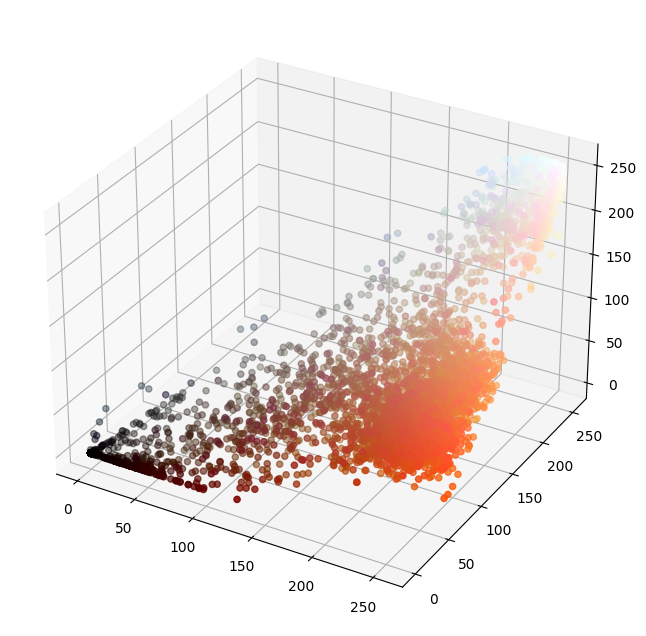

In [76]:
pixels_list_rgb = nemo.reshape(-1, 3)

pixels_list_rgb.shape

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = "3d")

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c = pixels_list_rgb/255)
plt.show()

In [77]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

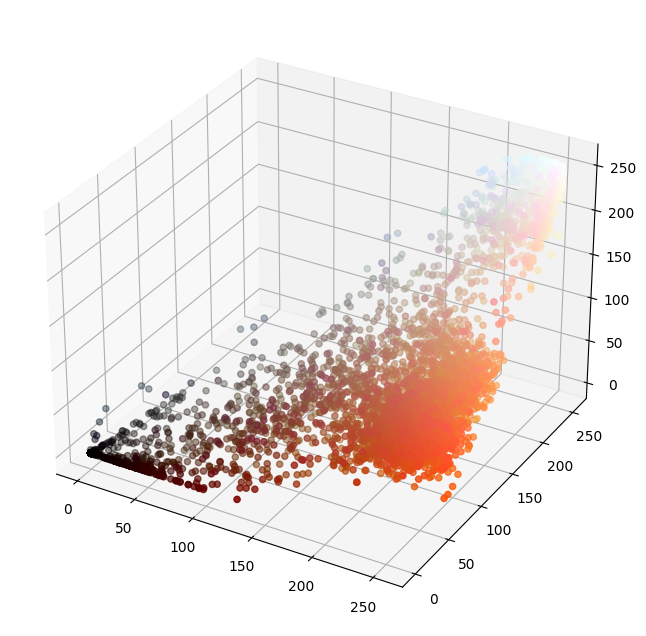

In [78]:
pixels_list_hsv = nemo.reshape(-1, 3)

pixels_list_hsv.shape

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = "3d")

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb/255)
plt.show()

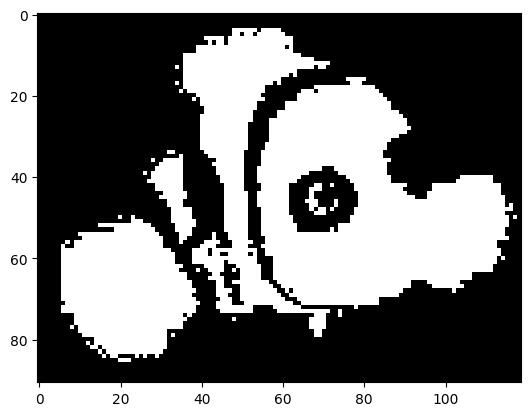

In [79]:
light_orange = (1, 140, 100)
dark_orange = (18, 255, 255)

mask = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask, cmap="gray")
plt.show()

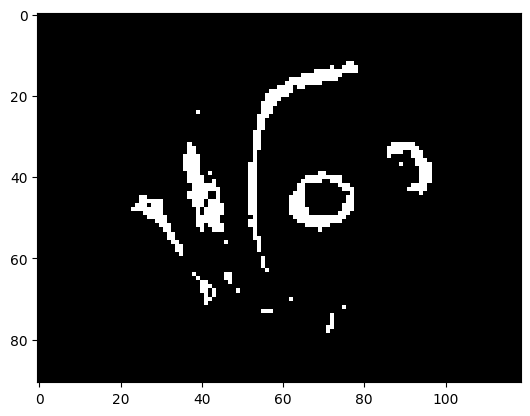

In [80]:
light_white = (0, 0, 200)
dark_white = (150, 64, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap="gray")
plt.show()

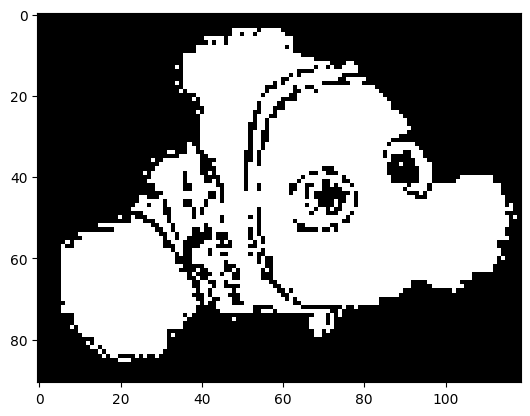

In [81]:
final_mask = mask + mask_white
plt.imshow(final_mask, cmap="gray")
plt.show()

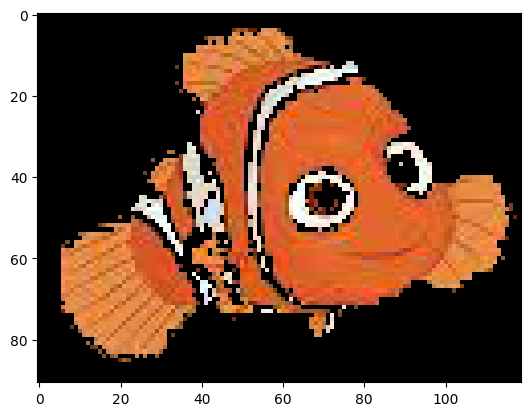

In [82]:
final_result = cv2.bitwise_and(nemo, nemo, mask = final_mask)
plt.imshow(final_result)
plt.show()

In [83]:
X_train = pixels_list_hsv / 255
X_train

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [84]:
Y_train = final_mask.reshape(-1,) // 255
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [85]:
knn = KNN(3)
knn.fit(X_train, Y_train)

In [86]:
new_pixel = np.array([200, 87, 47])/255
knn.predict([new_pixel])

100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


[1]

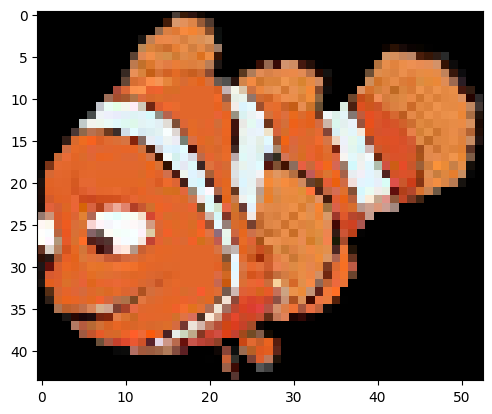

In [87]:
dadash_nemo = cv2.imread("dadash_nemo.png")
dadash_nemo = cv2.cvtColor(dadash_nemo, cv2.COLOR_BGR2RGB)
dadash_nemo = cv2.resize(dadash_nemo, (0, 0), fx= 0.3, fy=0.3)
dadash_nemo_hsv = cv2.cvtColor(dadash_nemo, cv2.COLOR_RGB2HSV)
dadash_nemo_hsv.shape
plt.imshow(dadash_nemo)
plt.show()

In [88]:
X_test = dadash_nemo_hsv.reshape(-1, 3) / 255
X_test.shape

(2332, 3)

In [89]:
Y_pred = knn.predict(X_test)

  4%|▎         | 87/2332 [00:18<07:54,  4.73it/s]


KeyboardInterrupt: 

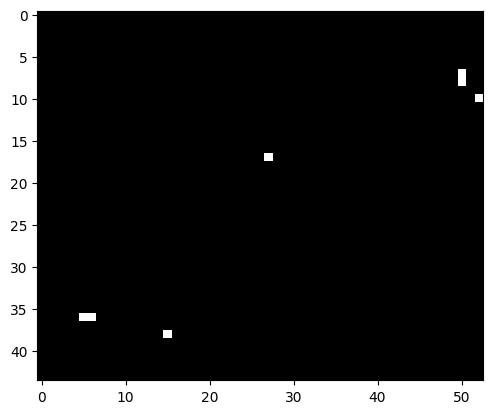

In [ ]:
output = np.array(Y_pred).reshape(dadash_nemo_hsv.shape[:2])
plt.imshow(output, cmap="gray")
plt.show()